# Segmentation Algorithm Demo for MYH10


----------------------------------------
description of the structure 

----------------------------------------

Also, we may add a picture of the corresponding row in the lookup table for readers to correlate this notebook with a specifc row in the lookup table.


----------------------------------------
PLACEHOLDER: description of the functions to be used, and the usage of each parameters

----------------------------------------


In [1]:
import numpy as np

# package for 3d visualization
from itkwidgets import view                              
from aicssegmentation.core.visual import seg_fluo_side_by_side,  single_fluorescent_view, segmentation_quick_view
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 12]

# package for io 
from aicsimageio import AICSImage, omeTifWriter                            

# function for core algorithm
from aicssegmentation.core.vessel import vesselness3D
from aicssegmentation.pre_processing_utils import intensity_normalization, boundary_preserving_smoothing_3d
from skimage.morphology import remove_small_objects     # function for post-processing (size filter)
from aicssegmentation.core.visual import explore_vesselness_3d

ImportError: No module named '_czifile'. Decoding of JXR and JPEG encoded images will not be available. Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/


## Loading the data

In [2]:
FILE_NAME = '/allen/aics/assay-dev/Segmentation/documentation/toolkit_paper/structures/MYH10/original/3500001319_100X_20170922_1-Scene-05-P5-E04.czi'
reader = AICSImage(FILE_NAME) 
IMG = reader.data

print(IMG.shape)

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


(1, 7, 65, 624, 924)


## Preview of the image

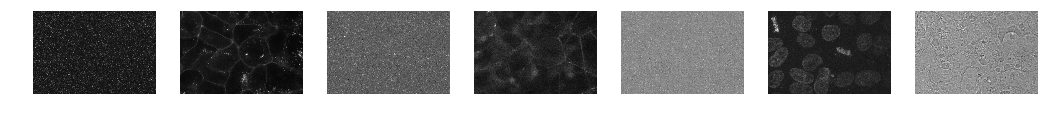

In [3]:
N_CHANNELS = IMG.shape[1]
MID_SLICE = np.int(0.5*IMG.shape[2])

fig, ax = plt.subplots(1, N_CHANNELS, figsize=(18,16), dpi=72, facecolor='w', edgecolor='k')
for channel in range(N_CHANNELS):
    ax[channel].axis('off')
    ax[channel].imshow(IMG[0,channel,MID_SLICE,:,:], cmap=plt.cm.gray)

## Image segmentation

### Step 1: Pre-Processing

In [3]:
################################
## PARAMETERS for this step ##
structure_channel = 3
intensity_scaling_param = [2.5, 17]
################################

structure_img0 = IMG[0,structure_channel,:,:,:]

# intensity normalization
structure_img = intensity_normalization(structure_img0, scaling_param=intensity_scaling_param)

# smoothing with 2d gaussian filter slice by slice 
structure_img_smooth = boundary_preserving_smoothing_3d(structure_img)

intensity normalization: normalize into [mean - 2.5 x std, mean + 17 x std] 
intensity normalization completes


In [15]:
view(single_fluorescent_view(structure_img))

Viewer(rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkImageF3 *' at 0x7f840e39b5…

#### If the contrast looks too off, you can play with the normalization parameters

In [5]:
from aicssegmentation.pre_processing_utils import suggest_normalization_param

In [10]:
suggest_normalization_param(structure_img0)

447.3610083025948
44.35174724281916
1212.0
331
1212
suggested upper range is 17.0, which is 1201.3407114305205
suggested upper range is 2.5, which is 336.4816401955469
So, suggested parameter for normalization is [2.5, 17.0]
You may also increase the first value (may loss some dim parts), or decrease the second value (may loss some texture in super bright regions) to further enhance the contrast


### Step 2: Core Algorithm

#### Run with default parameters as in Look-up Table

In [4]:
################################
## PARAMETERS for this step ##
vesselness_sigma = [1]
vesselness_cutoff = 0.06
################################

response = vesselness3D(structure_img_smooth, sigmas=vesselness_sigma,  tau=1, whiteonblack=True)
bw = response > vesselness_cutoff

response2 = vesselness3D(structure_img_smooth, sigmas=[0.5],  tau=1, whiteonblack=True)

response3 = vesselness3D(structure_img_smooth, sigmas=[2],  tau=1, whiteonblack=True)

response4 = vesselness3D(structure_img_smooth, sigmas=[3],  tau=1, whiteonblack=True)

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [8]:
view(segmentation_quick_view(response>0.01))

Viewer(rendered_image=<itkImagePython.itkImageUC3; proxy of <Swig Object of type 'itkImageUC3 *' at 0x7f4cb453…

In [10]:
view(segmentation_quick_view(response>0.015))

Viewer(rendered_image=<itkImagePython.itkImageUC3; proxy of <Swig Object of type 'itkImageUC3 *' at 0x7f4c4df7…

In [11]:
view(segmentation_quick_view(response3>0.2))

Viewer(rendered_image=<itkImagePython.itkImageUC3; proxy of <Swig Object of type 'itkImageUC3 *' at 0x7f4c4dfd…

In [12]:
# Find a region of interest (ROI) in segmentation image above, and then type in ROI below
# in the form of [Upper_Left_X, Upper_Left_Y, Lower_right_X, Lower_right_Y]
ROI = [393, 86,595,305]
view(seg_fluo_side_by_side(structure_img,bw,roi=ROI))

# or comment out the following line to see the whole FOV
#view(seg_fluo_side_by_side(structure_img,seg))

Viewer(rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkImageF3 *' at 0x7f50892cd5…

#### If the segmentation is satisfactory, go to Step 3; otherwise, you can tune parameters to improve the performance. Follow the steps below:

--------------------------
Placeholder:  Describe the effect of each parameter

------------------------------

In [16]:
# find a small region of interest, 
# type in below the coordinates of upper left corner and lower right corner of the ROI
# in the form of [Upper_Left_X, Upper_Left_Y, Lower_right_X, Lower_right_Y]
ROI = [393, 86,595,305]
view(explore_vesselness_3d(structure_img_smooth, sigma=[0.5, 2], th=0.15, roi=ROI))

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Viewer(rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkImageF3 *' at 0x7f50892cd6…

#### Now, if you have found a satisfatory set of parameters, type in the parameters below and re-run the segmentation. Then, move to step 3

In [17]:
# type in parameters here:
################################
## PARAMETERS for this step ##
vesselness_sigma = [0.5,2]
vesselness_cutoff = 0.15
################################

response = vesselness3D(structure_img_smooth, sigmas=vesselness_sigma,  tau=1, whiteonblack=True)
bw = response > vesselness_cutoff

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


#### Step 3: Post-Processing 

In [19]:
################################
## PARAMETERS for this step ##
minArea = 4
################################

final_seg = remove_small_objects(bw>0, min_size=minArea, connectivity=1, in_place=False)

## Result inspection

In [17]:
view(seg_fluo_side_by_side(structure_img,SEG))

Viewer(rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkImageF3 *' at 0x7f2b44072c…

### You can also focus your inspection on a small ROI

In [ ]:
# Find ROI in segmentation image above (not the raw image on the right part), and then type in ROI below
# in the form of [Upper_Left_X, Upper_Left_Y, Lower_right_X, Lower_right_Y]
ROI = [244, 361, 441, 562]
view(seg_fluo_side_by_side(structure_img,SEG, roi=ROI))

### You may also physically save the segmentation results into a ome.tif file

In [27]:
SEG= SEG>0
out=SEG.astype(np.uint8)
out[out>0]=255
writer = omeTifWriter.OmeTifWriter('/allen/aics/assay-dev/Segmentation/documentation/toolkit_paper/structures/DSP/test1.ome.tif')
writer.save(out)